In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
import seaborn as sns


In [2]:
train_data = pd.read_csv("C:/Users/mowma/Downloads/playground-series-s6e1/train.csv")
test_data = pd.read_csv("C:/Users/mowma/Downloads/playground-series-s6e1/test.csv")

This data is super clean

In [3]:

train_data.head(10)
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


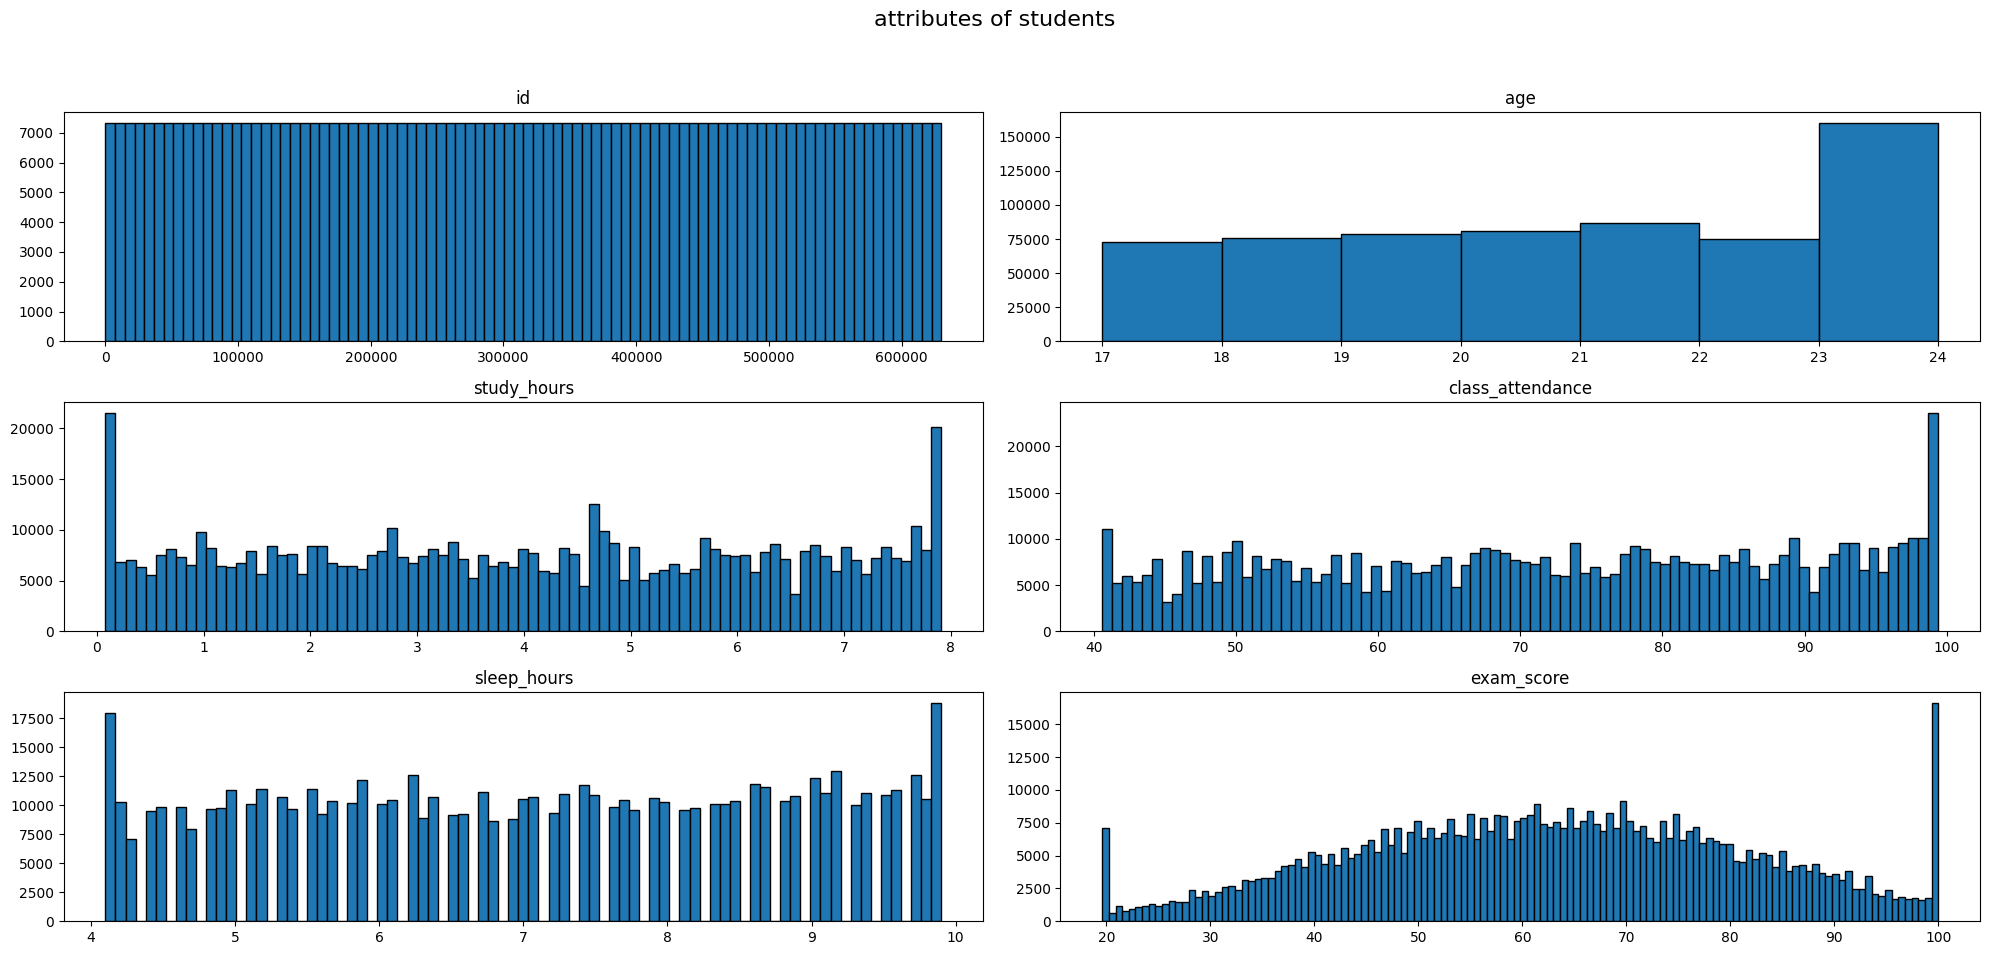

In [4]:
train_data.hist(
    bins='auto',
    figsize=(20,10),
    edgecolor='black',
    grid=False,
    alpha=1
)

plt.suptitle("attributes of students", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

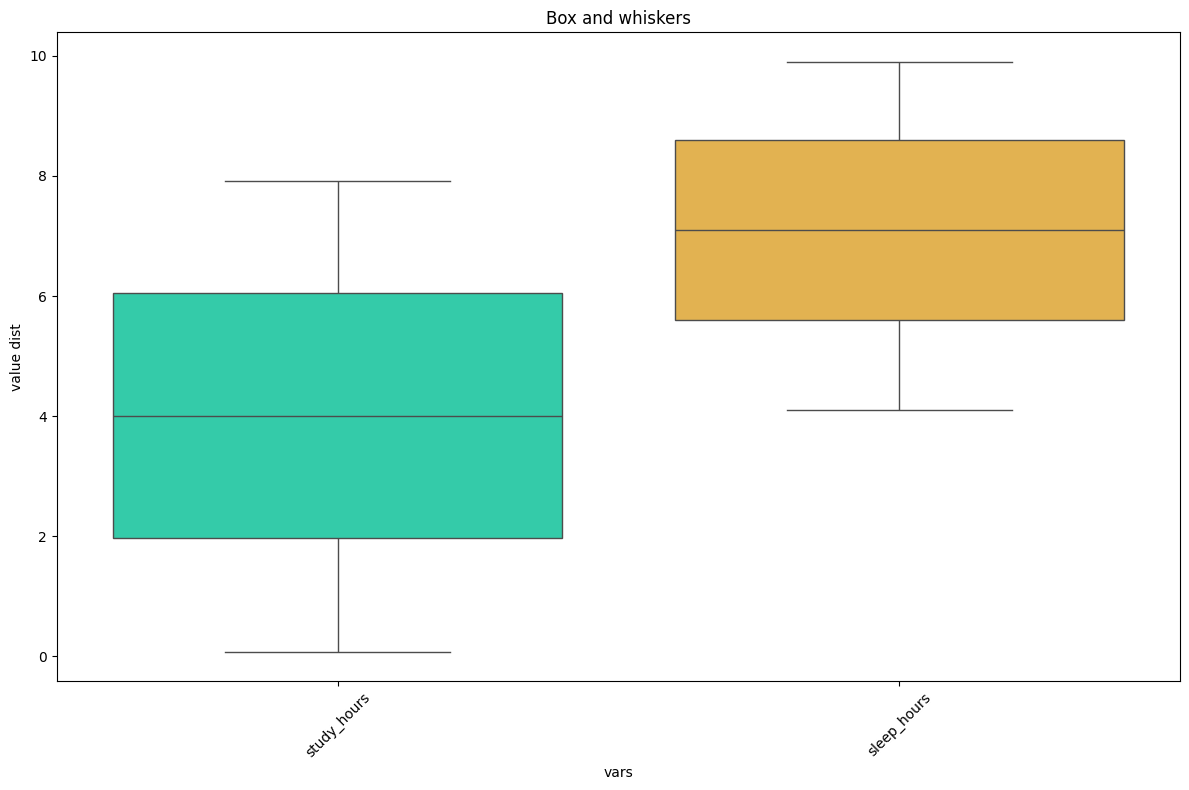

In [5]:
features_interest = ['study_hours', 'sleep_hours', ]

plt.figure(figsize=(12, 8))
sns.boxplot(data=train_data[features_interest], palette='turbo')
plt.title('Box and whiskers')
plt.xlabel('vars')
plt.ylabel('value dist')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
descriptive_stats = train_data.describe()
print(descriptive_stats)

                  id            age    study_hours  class_attendance  \
count  630000.000000  630000.000000  630000.000000     630000.000000   
mean   314999.500000      20.545821       4.002337         71.987261   
std    181865.479132       2.260238       2.359880         17.430098   
min         0.000000      17.000000       0.080000         40.600000   
25%    157499.750000      19.000000       1.970000         57.000000   
50%    314999.500000      21.000000       4.000000         72.600000   
75%    472499.250000      23.000000       6.050000         87.200000   
max    629999.000000      24.000000       7.910000         99.400000   

         sleep_hours     exam_score  
count  630000.000000  630000.000000  
mean        7.072758      62.506672  
std         1.744811      18.916884  
min         4.100000      19.599000  
25%         5.600000      48.800000  
50%         7.100000      62.600000  
75%         8.600000      76.300000  
max         9.900000     100.000000  


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age','study_hours','class_attendance','sleep_hours', 'exam_score']
train_data_scaled = train_data.copy()
train_data_scaled = train_data_scaled[numerical_features]
train_data_scaled = scaler.fit_transform(train_data_scaled)

train_data_scaled = pd.DataFrame(train_data_scaled, columns=numerical_features)



<Axes: >

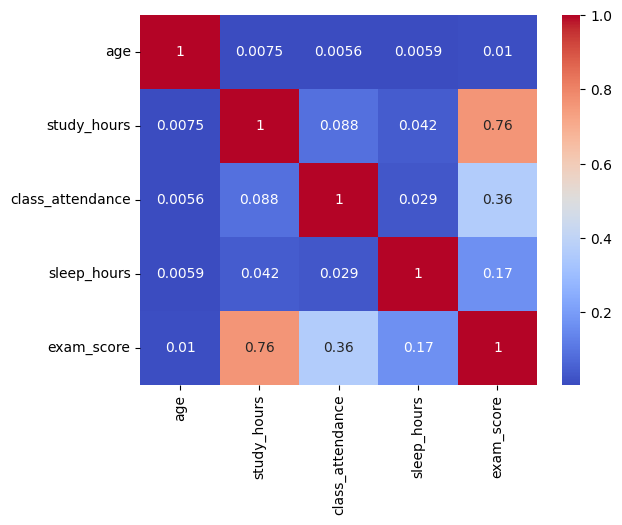

In [8]:
sns.heatmap(train_data_scaled.corr(),annot=True,cmap='coolwarm')

We can See study Hours having the highest correlation to exam score here, decided to standard scale

In [9]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                270000 non-null  int64  
 1   age               270000 non-null  int64  
 2   gender            270000 non-null  object 
 3   course            270000 non-null  object 
 4   study_hours       270000 non-null  float64
 5   class_attendance  270000 non-null  float64
 6   internet_access   270000 non-null  object 
 7   sleep_hours       270000 non-null  float64
 8   sleep_quality     270000 non-null  object 
 9   study_method      270000 non-null  object 
 10  facility_rating   270000 non-null  object 
 11  exam_difficulty   270000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 24.7+ MB


model fitting aswell as one-hot encoding for categorical and boolean attributes

In [10]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [20]:
candidate_features = [
    'age','gender','course','study_hours','class_attendance','internet_access',
    'sleep_hours','sleep_quality','study_method','exam_difficulty','facility_rating'
]

X_train = train_data[candidate_features].copy()
y_train = train_data["exam_score"].copy()
X_test  = test_data[candidate_features].copy()

cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train.select_dtypes(include=["number", "bool"]).columns.tolist()

pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop"
)

model = XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

pipe = Pipeline([("prep", pre), ("model", model)])

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)


Testing to get model evaluation scores such as RMSE, MAE

In [13]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_1 = train_data[candidate_features].copy()
y_1 = train_data['exam_score'].copy()

X_tr, X_val, y_tr, y_val = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
pipe.fit(X_tr,y_tr)
y_pred=pipe.predict(X_val)

rmse = sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)        
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R^2 : {r2:.3f}")


RMSE: 8.768
MAE : 6.993
R^2 : 0.784


Cross Validation testing

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X_1, y_1, cv=5, scoring="neg_root_mean_squared_error")
rmse_folds = -scores
rmse_folds.mean(), rmse_folds.std()

(np.float64(8.7804343504491), np.float64(0.013140842974947182))

In [15]:
print(rmse_folds)

[8.76716367 8.79514003 8.76338873 8.79365454 8.78282478]


Need to retrieve original attribute names then map them to their respective values after they were one hot encoded in order to see which variables have the most implied gain.


In [ ]:
pre = pipe.named_steps["prep"]          
xgb = pipe.named_steps["model"]       

feature_names = pre.get_feature_names_out()
feature_names = np.array(feature_names)


Using booster to analyze feature importance

In [28]:
booster = model.get_booster()
gain = booster.get_score(importance_type="gain")  

mapped = (
    pd.Series(gain)
      .rename_axis("f")
      .reset_index(name="gain")
)


mapped["idx"] = mapped["f"].str[1:].astype(int)
mapped["feature"] = mapped["idx"].map(lambda i: feature_names[i])

mapped = mapped.sort_values("gain", ascending=False)[["feature", "gain"]]
mapped.head(5)



,feature,gain
27,num__study_hours,272336.343750
14,cat__sleep_quality_poor,88849.601562
15,cat__study_method_coaching,77926.210938
24,cat__facility_rating_low,66307.937500
13,cat__sleep_quality_good,64994.484375


G3

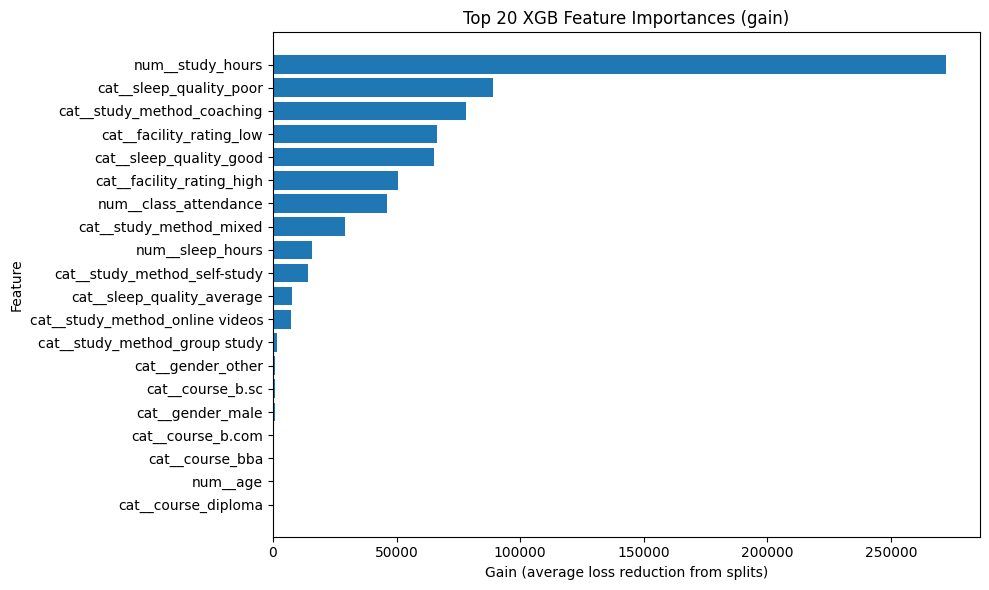

In [32]:

top_n = 20
plot_df = mapped.head(top_n).sort_values("gain")  # ascending for a nice barh

plt.figure(figsize=(10, 6))
plt.barh(plot_df["feature"], plot_df["gain"])
plt.xlabel("Gain (average loss reduction from splits)")
plt.ylabel("Feature")
plt.title(f"Top {top_n} XGB Feature Importances (gain)")
plt.tight_layout()
plt.show()
